In [1]:
def main(n):

    def bracelet_pairs(start_pair):
        seen_pairs = set()
        current_pair = tuple(start_pair)
        
        while current_pair not in seen_pairs:
            seen_pairs.add(current_pair)
            next_num = (current_pair[0] + current_pair[1]) % n
            current_pair = (current_pair[1], next_num)
        
        return seen_pairs

    period_pairs = {}
    unique_period_counts = {}

    for i in range(n):
        for j in range(n):
            pairs = bracelet_pairs((i, j))
            period_size = len(pairs)
            
            if period_size not in period_pairs:
                period_pairs[period_size] = [pairs]
                unique_period_counts[period_size] = 1
            else:
                is_unique = True
                for existing_pairs in period_pairs[period_size]:
                    if pairs & existing_pairs:
                        is_unique = False
                        break
                
                if is_unique:
                    period_pairs[period_size].append(pairs)
                    unique_period_counts[period_size] += 1
    
    return unique_period_counts


total_num_bracelets = 0

unique_bracelet_counts = main(15)
print(f"Number of unique bracelets for each period size (modulo 15):")
for period_size, count in sorted(unique_bracelet_counts.items()):
    print(f"Period Size: {period_size}, Unique Count: {count}")

Number of unique bracelets for each period size (modulo 15):
Period Size: 1, Unique Count: 1
Period Size: 4, Unique Count: 1
Period Size: 8, Unique Count: 5
Period Size: 20, Unique Count: 1
Period Size: 40, Unique Count: 4


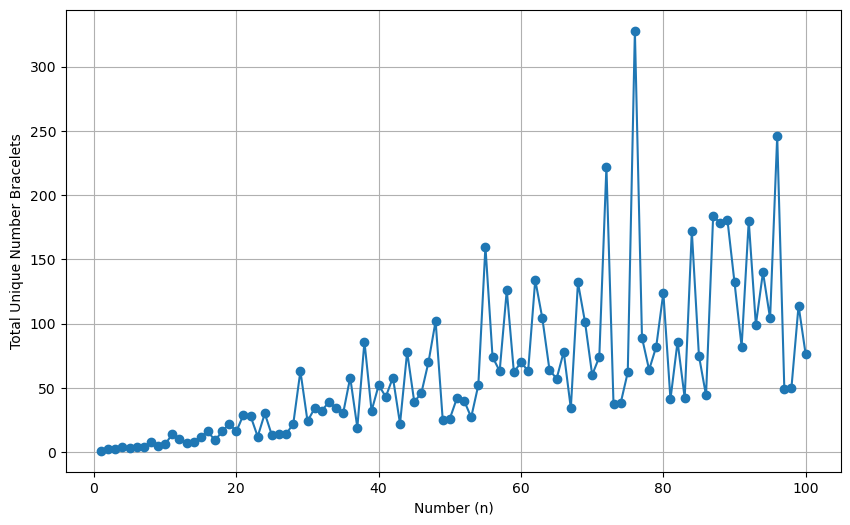

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def main(n):
    def bracelet_pairs(start_pair):
        seen_pairs = set()
        current_pair = tuple(start_pair)
        while current_pair not in seen_pairs:
            seen_pairs.add(current_pair)
            next_num = (current_pair[0] + current_pair[1]) % n
            current_pair = (current_pair[1], next_num)
        return seen_pairs

    unique_bracelets = set()

    for i in range(n):
        for j in range(n):
            pairs = bracelet_pairs((i, j))
            unique_bracelets.add(frozenset(pairs))  # Use frozenset for hashability

    return len(unique_bracelets)

# Calculate total unique bracelets for each n from 1 to 100
n_values = np.arange(1, 101)
total_bracelets = [main(n) for n in n_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, total_bracelets, marker='o')
plt.xlabel('Number (n)')
plt.ylabel('Total Unique Number Bracelets')
plt.grid(True)
plt.savefig('C:/Users/James/Downloads/figure.pdf')
plt.show()